## Importok

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#import sys
#reload(sys)
#sys.setdefaultencoding("utf-8")

###Fájlok beolvasása

In [3]:
boltok = pd.read_excel("Boltok.xlsx") #Boltok
cikk = pd.read_excel("Cikk.xlsx") #Cikkek
cikkcsop = pd.read_excel("Cikk_cikkcsop.xlsx") #Cikk_cikkcsoportok
cikkcsoportok = pd.read_excel("Cikkcsoportok.xlsx") #Cikkcsoportok
geo = pd.read_excel("Geo adatok.xlsx") #Geomadatok
keszlet = pd.read_excel("keszlet.xlsx") #Keszlet
gyarto = pd.read_excel("Gyartok.xlsx") #Gyartok

#Ismerkedünk a Python-nal, egy-két alap lekérdezés és kiiratás 

### Hány darab bolt van?

In [2]:
len(boltok)

NameError: name 'boltok' is not defined

In [6]:
boltok.head()

,sek_id,sek_desc,sek_cim
0,10200,Cég 0. Raktár1,5600
1,10300,Cég 0. Raktár2,5600
2,30103,Cég I. Bolt1,5500
3,30104,Cég I. Bolt2,5510
4,30105,Cég I. Bolt3,5516


In [7]:
cikk.head()

,cik_id,cik_desc2,vtsz_id,cik_me_id,cik_gyart,cjel_id
0,1000001,Termék 0000001,304205600,DB,50136,A
1,1000002,Termék 0000002,303781200,DB,50136,A
2,1000003,Termék 0000003,1517109000,DB,50260,A
3,1000004,Termék 0000004,403905300,DB,50258,A
4,1000008,Termék 0000005,2202901010,DB,50232,A


In [8]:
cikkcsop.head()

,ccsop_id4,cik_id
0,3303,1000001
1,3303,1000002
2,3206,1000003
3,3204,1000004
4,219,1000005


In [9]:
cikkcsoportok.tail()
#len(cikkcsoportok)

,ccsop_id,ccsop_desc,ccsop_id2,ccsop_desc2,ccsop_id3,ccsop_desc3,ccsop_id4,ccsop_desc4
304,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,86,KERTÉSZETI TERMÉKEK,8602,VIRÁGFÖLD
305,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,86,KERTÉSZETI TERMÉKEK,8603,KERTÉSZETI CIKKEK
306,1,Alap cikkcsoport,90,SZOLGÁLTATÁSOK,91,SZOLGÁLTATÁSOK,9101,SZOLGÁLTATÁSOK
307,1,Alap cikkcsoport,90,SZOLGÁLTATÁSOK,92,GÖNGYÖLEG,9201,TAPADÓ GÖNYGYÖLEG
308,1,Alap cikkcsoport,90,SZOLGÁLTATÁSOK,92,GÖNGYÖLEG,9202,NEM TAPADÓ GÖNYGYÖLEG


In [11]:
geo[(geo["geo_orszag"] == "Magyarország".decode('utf-8')) &(geo["geo_megye"] == "Bekes megye".decode('utf-8'))].head()

,geo_id,geo_kerulet,geo_varos,geo_megye,geo_regio,geo_orszag
1590,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
1591,5501,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
1592,5502,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
1593,5510,NaN,Dévaványa,Bekes megye,Dél-Alföld,Magyarország
1594,5515,NaN,Ecsegfalva,Bekes megye,Dél-Alföld,Magyarország


##Készlet kerekítése 100-asra

In [12]:
keszlet.mennyiseg = keszlet.mennyiseg.apply(lambda x: np.round(x,decimals=-2))
keszlet.head()
#np.round(keszlet.mennyiseg, decimals=-2)

,cik,tph,datum,mennyiseg
0,1000002,30302,2016-02-02,0
1,1000004,30302,2016-02-02,0
2,1000008,30302,2016-02-02,0
3,1000011,30302,2016-02-02,0
4,1000013,30302,2016-02-02,0


In [18]:
keszlet2 = keszlet
keszlet2 = keszlet2[keszlet2["mennyiseg"] > 0]
keszlet2.head()

,cik,tph,datum,mennyiseg
230,1001063,30302,2016-02-02,300
231,1001065,30302,2016-02-02,100
332,1001575,30302,2016-02-02,100
384,1001876,30302,2016-02-02,100
447,1002138,30302,2016-02-02,100


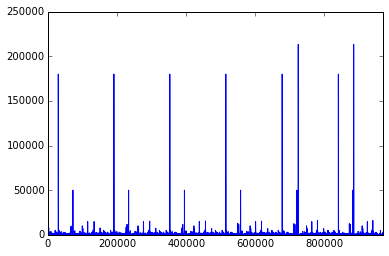

In [19]:
keszlet2.mennyiseg.plot()

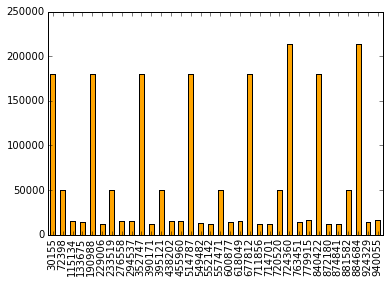

In [20]:
keszlet2[keszlet2["mennyiseg"]>10000].mennyiseg.plot(kind='bar', color='orange')

In [23]:
milyentermek=keszlet2[keszlet2["mennyiseg"]>10000]
eredm = pd.merge(milyentermek, cikkcsop, left_on='cik', right_on='cik_id', how='inner')
eredm_2 = pd.merge(eredm,cikkcsoportok, left_on='ccsop_id4', right_on='ccsop_id4', how='inner')
eredm_2.sort(columns="mennyiseg",ascending=False).head()

,cik,tph,datum,mennyiseg,ccsop_id4,cik_id,ccsop_id,ccsop_desc,ccsop_id2,ccsop_desc2,ccsop_id3,ccsop_desc3,ccsop_desc4
19,1011978,30105,2016-02-07,213200,3809,1011978,1,Alap cikkcsoport,31,ÉLELMISZER,38,ÉDESSÉG,"CUKORKÁK,DRAZSÉK, KARAMELLÁK"
18,1011978,30105,2016-02-06,213200,3809,1011978,1,Alap cikkcsoport,31,ÉLELMISZER,38,ÉDESSÉG,"CUKORKÁK,DRAZSÉK, KARAMELLÁK"
0,1007509,30318,2016-02-02,180000,3809,1007509,1,Alap cikkcsoport,31,ÉLELMISZER,38,ÉDESSÉG,"CUKORKÁK,DRAZSÉK, KARAMELLÁK"
15,1007509,30318,2016-02-07,180000,3809,1007509,1,Alap cikkcsoport,31,ÉLELMISZER,38,ÉDESSÉG,"CUKORKÁK,DRAZSÉK, KARAMELLÁK"
3,1007509,30318,2016-02-03,180000,3809,1007509,1,Alap cikkcsoport,31,ÉLELMISZER,38,ÉDESSÉG,"CUKORKÁK,DRAZSÉK, KARAMELLÁK"


## Legkeresetebb termékekből hány darab van a boltokban?

In [24]:
keresett = keszlet2[keszlet2["cik"] == 1011978]
asdf = keresett.groupby(["tph"]).mean()

In [25]:
asdf["mennyiseg"]

tph
30105    213200.000000
30110       200.000000
30116       100.000000
30123       200.000000
30126       100.000000
30313       150.000000
30318       100.000000
30323       100.000000
30327       200.000000
30328       133.333333
30329       200.000000
30330       200.000000
Name: mennyiseg, dtype: float64

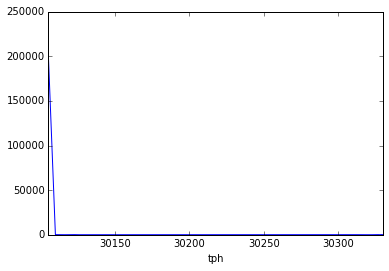

In [26]:
asdf.mennyiseg.plot()

In [27]:
keszlet_reszlet = keszlet[(keszlet["tph"] == 30313) & (keszlet["datum"] == "2016-02-02") & (keszlet["cik"] < 1000022)]

In [28]:
keszlet_reszlet
result = pd.merge(keszlet, cikkcsop, left_on='cik', right_on='cik_id', how='inner')
result_2 = pd.merge(result,cikkcsoportok, left_on='ccsop_id4', right_on='ccsop_id4', how='inner')
result_2.head()

,cik,tph,datum,mennyiseg,ccsop_id4,cik_id,ccsop_id,ccsop_desc,ccsop_id2,ccsop_desc2,ccsop_id3,ccsop_desc3,ccsop_desc4
0,1000002,30302,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
1,1000002,30313,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
2,1000002,30316,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
3,1000002,30318,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
4,1000002,30319,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"


#Feladatok

## Vegyük ki a geo adathalmazból a nem magyarországi adatokat!

In [30]:
geo = geo[geo["geo_orszag"] == "Magyarország".decode('utf-8')]
geo.head()

,geo_id,geo_kerulet,geo_varos,geo_megye,geo_regio,geo_orszag
0,0,NaN,Töltse Ki,Nem besorolt,Nem besorolt,Magyarország
3,1000,NaN,Budapest,Budapest,Közép-Magyarország,Magyarország
4,1001,NaN,Budapest,Budapest,Közép-Magyarország,Magyarország
5,1010,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország
6,1011,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország


##Nézzük meg, milyen területű készleteink vannak (hol vannak a boltok)!
###(félek hogy csak Békés megyeiek lesznek :( ) - igen


In [31]:
res=pd.merge(boltok, keszlet, left_on='sek_id', right_on='tph', how='inner')         
res2=pd.merge(res, geo, left_on='sek_cim', right_on='geo_id', how='inner')
res2.head()

,sek_id,sek_desc,sek_cim,cik,tph,datum,mennyiseg,geo_id,geo_kerulet,geo_varos,geo_megye,geo_regio,geo_orszag
0,30103,Cég I. Bolt1,5500,1000002,30103,2016-02-02,0,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
1,30103,Cég I. Bolt1,5500,1000004,30103,2016-02-02,0,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
2,30103,Cég I. Bolt1,5500,1000008,30103,2016-02-02,0,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
3,30103,Cég I. Bolt1,5500,1000011,30103,2016-02-02,0,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
4,30103,Cég I. Bolt1,5500,1000013,30103,2016-02-02,0,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország


In [32]:
set(res2["geo_megye"].tolist())

{u'Bekes megye'}

## Csináljunk egy táblázatot, amelyben megnézzük hogy mely terméket ki gyártotta!

In [33]:
gyarto.head()

,gyarto_id,gyarto_desc
0,50146,Gyártó 1
1,52600,Gyártó 2
2,52612,Gyártó 3
3,53022,Gyártó 4
4,53050,Gyártó 5


In [34]:
result = pd.merge(cikk, cikkcsop, left_on='cik_id', right_on='cik_id', how='inner')
result.drop('cjel_id', axis=1, inplace=True)
result.drop('cik_me_id', axis=1, inplace=True)
result.drop('vtsz_id', axis=1, inplace=True)
result.head()

,cik_id,cik_desc2,cik_gyart,ccsop_id4
0,1000001,Termék 0000001,50136,3303
1,1000002,Termék 0000002,50136,3303
2,1000003,Termék 0000003,50260,3206
3,1000004,Termék 0000004,50258,3204
4,1000008,Termék 0000005,50232,3508


In [35]:
result2 = pd.merge(result, cikkcsoportok, left_on='ccsop_id4', right_on='ccsop_id4', how='inner')
result2.drop('ccsop_id4', axis=1, inplace=True)
result2.drop('ccsop_id', axis=1, inplace=True)
result2.drop('ccsop_id2', axis=1, inplace=True)
result2.drop('ccsop_id3', axis=1, inplace=True)
result2.head()

,cik_id,cik_desc2,cik_gyart,ccsop_desc,ccsop_desc2,ccsop_desc3,ccsop_desc4
0,1000001,Termék 0000001,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
1,1000002,Termék 0000002,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
2,1000319,Termék 0000269,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
3,1000584,Termék 0000468,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
4,1000586,Termék 0000470,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"


In [36]:
result3 = pd.merge(result2, gyarto, left_on='cik_gyart', right_on='gyarto_id', how='inner')
result3.drop('gyarto_id',axis=1, inplace=True)
result3.head()

,cik_id,cik_desc2,cik_gyart,ccsop_desc,ccsop_desc2,ccsop_desc3,ccsop_desc4,gyarto_desc
0,1000001,Termék 0000001,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
1,1000002,Termék 0000002,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
2,1001142,Termék 0000899,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
3,1015407,Termék 0010280,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
4,1015408,Termék 0010281,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93


## Listázd ki milyen termékeink vannak (ccsop_desc4)! Mindegyik csak egyszer szerepeljen!

In [37]:
csop=list(set(cikkcsoportok["ccsop_desc4"].tolist()))
ccsop4 = pd.DataFrame(csop)
ccsop4.columns = ["Termék"]
ccsop4.head()

,Termék
0,KIS KISZERELÉS?
1,"PEZSG?TABLETTÁK, ITALPOROK"
2,CSIRKE CSOMAGOLT
3,NAPOZÓSZEREK
4,SÓ ZACSKÓS


#>>>>>>>>>>>>>>>>>Diagram feladatok:<<<<<<<<<<<<<<<<<<<<<<<

## Készítsünk diagramot, hogy egy adott napon, adott boltnak milyen termékből mennyi készlete volt!
### hint: előtte ugye össze kell mergelni a termékeket a készlettel, és akkor a kódsorban megadott feltétel alapján kell megcsinálni az eloszlást :) Remélhetőleg  bplot vagy pyplot vagy seaborn-nel meg tudjuk szépen csinálni, mert először nem akaródzott

In [38]:
elso = keszlet2[(keszlet2["tph"]==30302) & (keszlet2["datum"]=="2016-02-02")]
elso.index = elso["cik"]
len(elso)

356

In [39]:
elso.drop("cik",axis=1, inplace=True)
elso.drop("tph",axis=1, inplace=True)
elso.drop("datum",axis=1, inplace=True)

D:\Program Files (x86)\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Program Files (x86)\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
D:\Program Files (x86)\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()

In [40]:
#elso.drop("datum",axis=1, inplace=True)
#elso = elso[(elso["mennyiseg"]<1) & (elso["mennyiseg"]>-1) & (elso["mennyiseg"]!=0)]
elso = elso[(elso["mennyiseg"]>100)]
elso.head()

,mennyiseg
cik,
1001063,300
1002279,200
1002590,200
1002826,200
1002828,200


## A 30302-es telephelyen 200-nál nagyobb mennyiségű készletek diagramja:

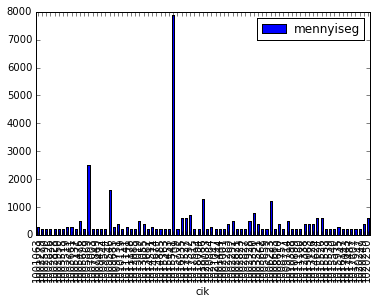

In [41]:
elso.plot(kind='bar')

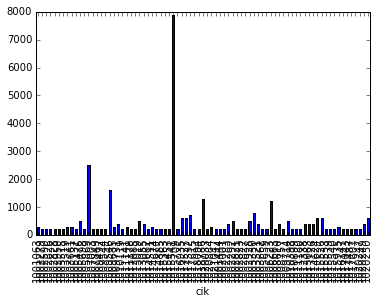

In [42]:
elso = elso[elso["mennyiseg"]>100]
elso.mennyiseg.plot(kind='bar')

## Készítsünk diagramot, hogy egy adott boltnak hogyan változik a készlete az adott egy hét alatt!

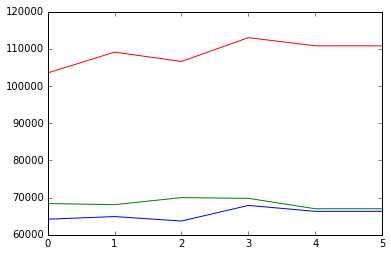

In [43]:
keszlet
masodik = keszlet2[(keszlet2["tph"]==30302)]
harmadik = keszlet2[(keszlet2["tph"]==30313)]
negyedik = keszlet2[(keszlet2["tph"]==30352)]
plt.plot(masodik.groupby(["tph","datum"])["mennyiseg"].sum()) #kék
plt.plot(harmadik.groupby(["tph","datum"])["mennyiseg"].sum()) #zöld
plt.plot(negyedik.groupby(["tph","datum"])["mennyiseg"].sum()) # piros
plt.show()

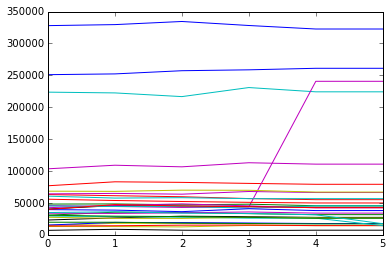

In [44]:
bolt = boltok.sek_id.tolist()
for i in bolt:
    plt.plot(keszlet2[(keszlet2["tph"])==i].groupby(["tph","datum"])["mennyiseg"].sum())
    

## Diagramm: Hány terméket gyártanak az egyes gyártók? +

In [46]:
#import collections
#cikkcnt=collections.Counter(cikk["cik_gyart"])
#cikkcnt.values()
#cikkcnt.keys()
result
result2 = pd.merge(result, gyarto, left_on='cik_gyart', right_on='gyarto_id', how='inner')
result2.groupby("gyarto_desc").cik_id.nunique().head()

gyarto_desc
Gyártó 1       1
Gyártó 101     4
Gyártó 102    68
Gyártó 103    13
Gyártó 104     9
Name: cik_id, dtype: int64

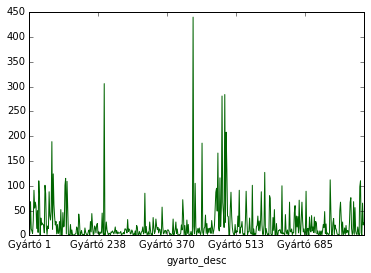

In [47]:
result2.groupby("gyarto_desc").cik_id.nunique().plot(color='DarkGreen')

## Sorba rendezve a termelési számok

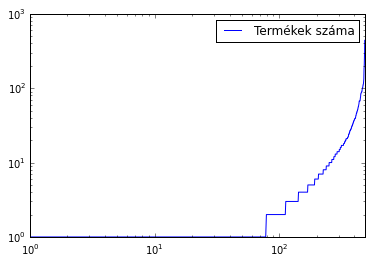

In [48]:
valami = result2.groupby("gyarto_desc").cik_id.nunique()
data = pd.DataFrame(sorted(valami))
data.columns = ["Termékek száma"]
data.plot(loglog=True)

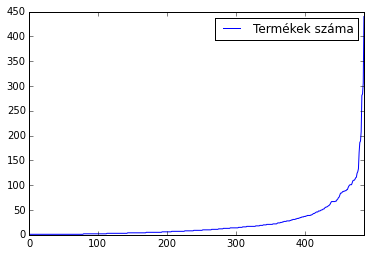

In [49]:
data.plot()

In [50]:
from collections import defaultdict

x = data["Termékek száma"]
dx = defaultdict(int)
for i in x:
    dx[i] += 1
print(dx)

defaultdict(<type 'int'>, {1: 79, 2: 34, 3: 30, 4: 27, 5: 23, 6: 14, 7: 19, 8: 13, 9: 13, 10: 13, 11: 10, 12: 7, 13: 10, 14: 12, 15: 6, 16: 6, 17: 13, 18: 6, 19: 5, 20: 5, 21: 9, 22: 6, 23: 1, 24: 4, 25: 3, 26: 2, 27: 4, 28: 5, 29: 2, 30: 2, 31: 4, 32: 2, 33: 3, 34: 2, 35: 2, 36: 3, 37: 3, 38: 2, 39: 5, 40: 2, 41: 1, 42: 1, 43: 2, 44: 1, 45: 1, 46: 3, 48: 3, 49: 1, 50: 2, 51: 1, 52: 2, 54: 1, 55: 1, 56: 2, 57: 1, 58: 1, 59: 1, 60: 1, 62: 1, 65: 1, 67: 6, 68: 2, 71: 1, 72: 1, 75: 1, 76: 1, 80: 1, 84: 2, 85: 1, 87: 2, 88: 2, 89: 2, 91: 2, 95: 1, 98: 1, 100: 1, 101: 3, 105: 1, 109: 1, 110: 2, 112: 1, 115: 1, 116: 1, 124: 1, 127: 1, 133: 1, 166: 1, 186: 1, 189: 1, 208: 1, 281: 1, 284: 1, 306: 1, 440: 1})


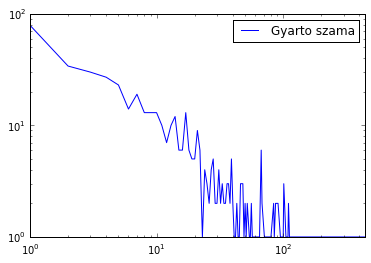

In [51]:
daata=pd.DataFrame.from_dict(dx,orient = "index")
daata.columns=["Gyarto szama"]
daata.plot(loglog=True)

## Diagramm: Hány gyártó gyárt terméket egy adott boltnak? +

In [56]:
tmp3 = pd.merge(keszlet, cikk, left_on='cik', right_on='cik_id', how='inner')
tmp4=tmp3[tmp3["tph"]==30302]
tmp4
len(set(tmp4["cik_gyart"].tolist()))

344

In [57]:
tmp3.drop("cik",axis=1,inplace=True)
tmp3.drop("datum",axis=1,inplace=True)
tmp3.drop("cik_id",axis=1,inplace=True)
tmp3.drop("cik_desc2",axis=1,inplace=True)
tmp3.drop("vtsz_id",axis=1,inplace=True)
tmp3.drop("cik_me_id",axis=1,inplace=True)
tmp3.drop("cjel_id",axis=1,inplace=True)
tmp3.head()

,tph,mennyiseg,cik_gyart
0,30302,0,50136
1,30313,0,50136
2,30316,0,50136
3,30318,0,50136
4,30319,0,50136


In [58]:
tmp3.groupby(["tph","cik_gyart"]).count().head()

mennyiseg
tph   cik_gyart           
30103 0               4805
      50004            870
      50006             12
      50008            120
      50016              6

In [59]:
bolt_gyarto=tmp3.groupby(["tph"]).cik_gyart.nunique()
pd.DataFrame(bolt_gyarto).head()

,cik_gyart
tph,
30103,365
30104,421
30105,340
30106,320
30108,325


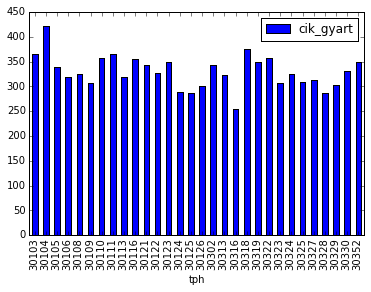

In [60]:
pd.DataFrame(bolt_gyarto).plot(kind='bar')

## -Diagramm: Adott termékcsoport mennyisége egy adott boltban! 

In [61]:
tmp5 = pd.merge(keszlet, cikk, left_on='cik', right_on='cik_id', how='inner')
tmp6 = pd.merge(tmp5, cikkcsop, left_on='cik', right_on='cik_id', how='inner')
tmp7=tmp6[(tmp6["tph"]==30302) & (tmp6["ccsop_id4"]==3303)]
len(tmp7)
tmp6.head()

,cik,tph,datum,mennyiseg,cik_id_x,cik_desc2,vtsz_id,cik_me_id,cik_gyart,cjel_id,ccsop_id4,cik_id_y
0,1000002,30302,2016-02-02,0,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
1,1000002,30313,2016-02-02,0,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
2,1000002,30316,2016-02-02,0,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
3,1000002,30318,2016-02-02,0,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
4,1000002,30319,2016-02-02,0,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002


In [62]:
tmp6.drop("cik_id_x",axis=1,inplace=True)
tmp6.drop("cik_id_y",axis=1,inplace=True)
tmp6.drop("cjel_id",axis=1,inplace=True)
tmp6.drop("cik_me_id",axis=1,inplace=True)
tmp6.drop("vtsz_id",axis=1,inplace=True)
tmp6.drop("cik",axis=1,inplace=True)
#tmp6.drop("cik_gyart",axis=1,inplace=True)
tmp6.drop("cik_desc2",axis=1,inplace=True)
tmp6.head()

,tph,datum,mennyiseg,cik_gyart,ccsop_id4
0,30302,2016-02-02,0,50136,3303
1,30313,2016-02-02,0,50136,3303
2,30316,2016-02-02,0,50136,3303
3,30318,2016-02-02,0,50136,3303
4,30319,2016-02-02,0,50136,3303


In [63]:
len(tmp6[(tmp6["ccsop_id4"]==18) & (tmp6["tph"]==30103)])

36

## Egyes boltokban, napi lebontásban mennyi termék volt a ccsop_id4 csoport tagjaiból!

In [64]:
tmp6.groupby(["tph","datum","ccsop_id4"]).sum().head()

mennyiseg  cik_gyart
tph   datum      ccsop_id4                      
30103 2016-02-02 0                  0     209008
                 18                 0          0
                 111                0     101196
                 112             1200    1046428
                 114                0     152084

## Egyes boltokban, hány darab termék volt a ccsop_id4 csoport tagjaiból!

In [65]:
tmp6.groupby(["tph","ccsop_id4"]).mennyiseg.count().head()

tph    ccsop_id4
30103  0             30
       18            36
       111           30
       112          228
       114           30
Name: mennyiseg, dtype: int64

## Diagram: Hány bolt van a városokban? +

In [66]:
#import collections
#cnt=collections.Counter(geo["geo_varos"])
#cnt.values()
#cnt.keys()
boltgeo=pd.merge(boltok, geo, left_on='sek_cim', right_on='geo_id', how='inner')
boltgeo.head()

,sek_id,sek_desc,sek_cim,geo_id,geo_kerulet,geo_varos,geo_megye,geo_regio,geo_orszag
0,10200,Cég 0. Raktár1,5600,5600,NaN,Békéscsaba,Bekes megye,Dél-Alföld,Magyarország
1,10300,Cég 0. Raktár2,5600,5600,NaN,Békéscsaba,Bekes megye,Dél-Alföld,Magyarország
2,30103,Cég I. Bolt1,5500,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
3,30116,Cég I. Bolt10,5500,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
4,30104,Cég I. Bolt2,5510,5510,NaN,Dévaványa,Bekes megye,Dél-Alföld,Magyarország


In [67]:
boltgeo.drop("geo_orszag",axis=1, inplace=True)
boltgeo.drop("geo_regio",axis=1, inplace=True)
boltgeo.drop("geo_megye",axis=1, inplace=True)
boltgeo.drop("geo_kerulet",axis=1, inplace=True)
boltgeo.drop("geo_id",axis=1, inplace=True)
boltgeo.drop("sek_cim",axis=1, inplace=True)
boltgeo.drop("sek_id",axis=1, inplace=True)

In [69]:
valami = boltgeo.groupby("geo_varos")

In [70]:
from collections import Counter
counts = Counter(boltgeo["geo_varos"].tolist())
#print(counts)

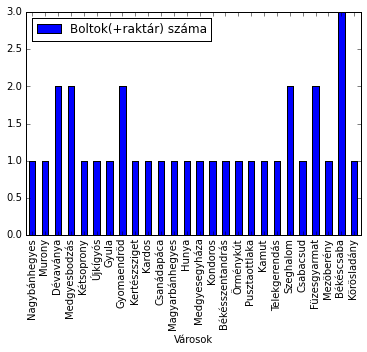

In [71]:
dictionary = dict(counts)
d = pd.DataFrame(dictionary.items())
d
d.columns = ['Városok', 'Boltok(+raktár) száma']
d.index=d["Városok"]
d.plot(kind='bar')

#CLUSTER:

## Leíró táblák

In [72]:
#cikk
#boltok
rendszer = pd.DataFrame(index=sorted(list(set(keszlet2.tph))),columns=sorted(list(set(keszlet2.cik))))
rendszer

,1000016,1000019,1000020,1000021,1000022,1000040,1000091,1000112,1000117,1000134,...,1021093,1021114,1021115,1021116,1021117,1021122,1021123,1021124,1021142,1021180
30103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
keszlet2
keszlet2.index = range(0,len(keszlet2))
keszlet2.head()

,cik,tph,datum,mennyiseg
0,1001063,30302,2016-02-02,300
1,1001065,30302,2016-02-02,100
2,1001575,30302,2016-02-02,100
3,1001876,30302,2016-02-02,100
4,1002138,30302,2016-02-02,100


Átírtam keszlet2-re, egyrészt hogy gyorsabban fusson le, másrészt hogy a kerekítettel számoljon.

In [75]:
a=0
keszletcik = keszlet2.cik.tolist() 
for i in keszletcik:
    rendszer[i][keszlet2.loc[[a]]["tph"]] = 1
    a+=1
rendszer
rendszer_copy = rendszer

#Csupa 1-esek(/0-sok) megkeresése

In [77]:
rendszer.fillna(0,inplace=True)
rendszer.head()

,1000016,1000019,1000020,1000021,1000022,1000040,1000091,1000112,1000117,1000134,...,1021093,1021114,1021115,1021116,1021117,1021122,1021123,1021124,1021142,1021180
30103,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
30104,0,0,1,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
30105,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
30106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30108,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [78]:
df_sum = pd.DataFrame(rendszer.sum(axis=0))
egyesek = df_sum[df_sum[0] == 30]
egyesek.head()

,0
1003330,30
1009685,30
1009714,30


### csupa egyesek vannak, csupa nullások nincsenek - minden boltban van/ egyikben sincs

In [79]:
lista_sum = egyesek.index.values.tolist()
for i in lista_sum:
    rendszer.drop(i,axis=1,inplace=True)
    
rendszer.head()
#df_sum.count()

,1000016,1000019,1000020,1000021,1000022,1000040,1000091,1000112,1000117,1000134,...,1021093,1021114,1021115,1021116,1021117,1021122,1021123,1021124,1021142,1021180
30103,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
30104,0,0,1,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
30105,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
30106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30108,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# Klaszter tph/frissáru

In [80]:
csop_desc = result3[result3["ccsop_desc2"]=="FRISSÁRU".decode("utf-8")]
csop_desc.head()

,cik_id,cik_desc2,cik_gyart,ccsop_desc,ccsop_desc2,ccsop_desc3,ccsop_desc4,gyarto_desc
0,1000001,Termék 0000001,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
1,1000002,Termék 0000002,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
2,1001142,Termék 0000899,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
3,1015407,Termék 0010280,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
4,1015408,Termék 0010281,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93


In [81]:
result_3 = result_2
result_3
result_2 = result_2[result_2["ccsop_desc2"]=="FRISSÁRU".decode("utf-8")]
result_2.head()

,cik,tph,datum,mennyiseg,ccsop_id4,cik_id,ccsop_id,ccsop_desc,ccsop_id2,ccsop_desc2,ccsop_id3,ccsop_desc3,ccsop_desc4
0,1000002,30302,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
1,1000002,30313,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
2,1000002,30316,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
3,1000002,30318,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
4,1000002,30319,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"


In [82]:
result_2.drop("datum",axis=1,inplace=True)
result_2.drop("ccsop_id4",axis=1,inplace=True)
result_2.drop("cik_id",axis=1,inplace=True)
result_2.drop("ccsop_id",axis=1,inplace=True)
result_2.drop("ccsop_id2",axis=1,inplace=True)
result_2.drop("ccsop_id3",axis=1,inplace=True)
result_2.drop("ccsop_desc3",axis=1,inplace=True)
result_2.drop("ccsop_desc2",axis=1,inplace=True)
result_2.drop("ccsop_desc",axis=1,inplace=True)
result_2.drop("ccsop_desc4",axis=1,inplace=True)

result_2

D:\Program Files (x86)\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Program Files (x86)\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
D:\Program Files (x86)\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()

,cik,tph,mennyiseg
0,1000002,30302,0
1,1000002,30313,0
2,1000002,30316,0
3,1000002,30318,0
4,1000002,30319,0
5,1000002,30323,0
6,1000002,30324,0
7,1000002,30325,0
8,1000002,30327,0
9,1000002,30329,0


In [83]:
result_2["mennyiseg"].max()

3400.0

In [85]:
klaszter = pd.DataFrame(index=sorted(list(set(keszlet.tph))), columns=sorted(list(set(result_2.cik))))
klaszter.fillna(0,inplace=True)
klaszter.head()

,1000001,1000002,1000003,1000004,1000009,1000010,1000011,1000013,1000014,1000015,...,1021160,1021161,1021163,1021258,1021260,1021261,1021264,1021269,1021272,1021273
30103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
frissarucik = result_2.cik.tolist()

result_2 = result_2[result_2["mennyiseg"] != 0]
result_2
hossz = len(result_2)
result_2.index = range(0,hossz)
result_2[result_2["cik"]==frissarucik[0]]

,cik,tph,mennyiseg
0,1015412,30104,100
1,1015412,30108,100
2,1015412,30111,100
3,1015412,30113,100
4,1015412,30110,100
5,1015412,30104,100
6,1015412,30108,100
7,1015412,30111,100
8,1015412,30113,100
9,1015412,30110,100


In [89]:
a=0
for i in frissarucik:
    klaszter[i][result_2.loc[[a]]["tph"]] += result_2.loc[[a]]["mennyiseg"].max()
    a += 1    
klaszter.head()

,1000001,1000002,1000003,1000004,1000009,1000010,1000011,1000013,1000014,1000015,...,1021160,1021161,1021163,1021258,1021260,1021261,1021264,1021269,1021272,1021273
30103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# %-olás + cluster

In [90]:
klaszter["sum"]=klaszter.sum(axis=1)
klaszter_copy=klaszter
klaszter.head()

,1000001,1000002,1000003,1000004,1000009,1000010,1000011,1000013,1000014,1000015,...,1021161,1021163,1021258,1021260,1021261,1021264,1021269,1021272,1021273,sum
30103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26900
30104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,66800
30105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6600
30106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5300
30108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21200


In [91]:
for i in klaszter.index.values.tolist():
    klaszter.loc[[i]] = klaszter.loc[[i]]/klaszter.loc[[i]]["sum"].max()
klaszter.head()

,1000001,1000002,1000003,1000004,1000009,1000010,1000011,1000013,1000014,1000015,...,1021161,1021163,1021258,1021260,1021261,1021264,1021269,1021272,1021273,sum
30103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [92]:
klaszter.drop("sum",axis=1,inplace=True)

D:\Program Files (x86)\Anaconda\lib\site-packages\IPython\kernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


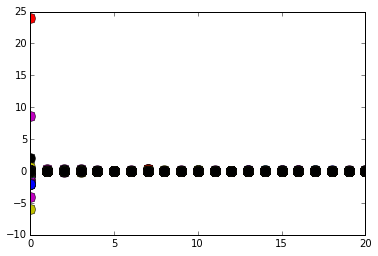

In [93]:
#klaszter.drop("cluster",axis=1,inplace=True)
klaszter.fillna(0,inplace=True)
from sklearn.cluster import KMeans
m = KMeans(7)
klaszter["cluster"] = m.fit_predict(klaszter.values)
for i in set(klaszter["cluster"]):
    c = klaszter[klaszter["cluster"] == i]
    c.drop("cluster",axis=1,inplace=True)
    plt.plot(c.values, 'o', markersize= 10)
#plt.axis([-0.01, 0.01, -0.031, 0.05])
plt.show()

In [94]:
klaszter["cluster"].head()

30103    2
30104    2
30105    2
30106    2
30108    0
Name: cluster, dtype: int32

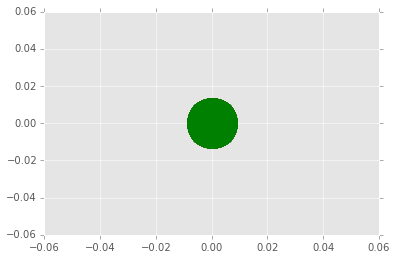

In [95]:
from matplotlib.pyplot import style
style.use("ggplot")
from sklearn.cluster import KMeans

X = klaszter.as_matrix()
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

colors = ["g.","r."]

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], X[i][2], X[i][3], X[i][4], X[i][5],
             colors[labels[i]], markersize = 100 )


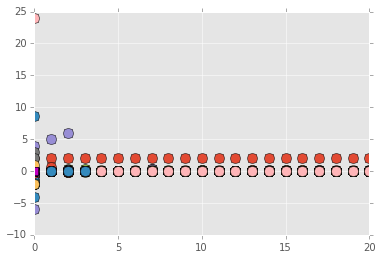

In [96]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq

data = klaszter.as_matrix()

# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plot(data[idx==0,:],'o',
     data[idx==1,:],'o',
     data[idx==2,:],'o',
     data[idx==3,:],'o',
     data[idx==4,:],'o',markersize=10) # third cluster points
plot(centroids[:,0],centroids[:,1],'sm',markersize=8)
show()

In [97]:
len(data[0])

1674

In [98]:
klaszter.to_csv("klaszter.csv", sep='\t', encoding='utf-8')

#Klaszter tph/ccsop_id2

In [102]:
csop_desc2 = sorted(list(set(result_3.ccsop_desc2.tolist())))
csoportok = pd.DataFrame(index=sorted(list(set(result_3.tph))), columns=csop_desc2)
csoportok.head()

,EGYÉB CIKKEK,FRISSÁRU,HÚS,HÚSKÉSZTMÉNYEK,ITALOK,NON FOOD TERMÉKEK,"PAPÍR, VEGYIÁRU",SZOLGÁLTATÁSOK,"ZÖLDSÉG, GYÜMÖLCS",ÉLELMISZER
30103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
result_3.head()

,cik,tph,datum,mennyiseg,ccsop_id4,cik_id,ccsop_id,ccsop_desc,ccsop_id2,ccsop_desc2,ccsop_id3,ccsop_desc3,ccsop_desc4
0,1000002,30302,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
1,1000002,30313,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
2,1000002,30316,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
3,1000002,30318,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
4,1000002,30319,2016-02-02,0,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"


In [104]:
result_3.drop("datum",axis=1,inplace=True)
result_3.drop("ccsop_id4",axis=1,inplace=True)
result_3.drop("cik_id",axis=1,inplace=True)
result_3.drop("ccsop_id",axis=1,inplace=True)
result_3.drop("ccsop_desc",axis=1,inplace=True)
result_3.drop("ccsop_id2",axis=1,inplace=True)
result_3.drop("ccsop_id3",axis=1,inplace=True)
result_3.drop("ccsop_desc3",axis=1,inplace=True)
result_3.drop("ccsop_desc4",axis=1,inplace=True)
result_3.head()

,cik,tph,mennyiseg,ccsop_desc2
0,1000002,30302,0,FRISSÁRU
1,1000002,30313,0,FRISSÁRU
2,1000002,30316,0,FRISSÁRU
3,1000002,30318,0,FRISSÁRU
4,1000002,30319,0,FRISSÁRU
5,1000002,30323,0,FRISSÁRU
6,1000002,30324,0,FRISSÁRU
7,1000002,30325,0,FRISSÁRU
8,1000002,30327,0,FRISSÁRU
9,1000002,30329,0,FRISSÁRU


In [105]:
result_3 = result_3[result_3["mennyiseg"] != 0]

In [106]:
result_3
result_3.index = range(0,len(result_3))
result_3.head()

,cik,tph,mennyiseg,ccsop_desc2
0,1015412,30104,100,FRISSÁRU
1,1015412,30108,100,FRISSÁRU
2,1015412,30111,100,FRISSÁRU
3,1015412,30113,100,FRISSÁRU
4,1015412,30110,100,FRISSÁRU


In [107]:
listacsop = result_3.ccsop_desc2.tolist()
a=0
csoportok.fillna(0,inplace=True)
for i in listacsop:
    csoportok[i][result_3.loc[[a]]["tph"]] += result_3.loc[[a]]["mennyiseg"].max()
    a += 1
csoportok.head()

,EGYÉB CIKKEK,FRISSÁRU,HÚS,HÚSKÉSZTMÉNYEK,ITALOK,NON FOOD TERMÉKEK,"PAPÍR, VEGYIÁRU",SZOLGÁLTATÁSOK,"ZÖLDSÉG, GYÜMÖLCS",ÉLELMISZER
30103,16600,26900,7400,1300,67800,9000,40300,24000,8000,241800
30104,47300,66800,34700,8200,237500,42600,160900,29200,36000,456100
30105,31700,6600,2700,0,49400,5500,22100,13400,3300,487300
30106,3300,5300,0,0,13800,600,19500,10800,400,34000
30108,6000,21200,1600,600,18800,400,21500,9500,2700,168100


In [108]:
csoportok["sum"]=csoportok.sum(axis=1)
#klaszter_copy=klaszter
#klaszter

In [109]:
for i in csoportok.index.values.tolist():
    csoportok.loc[[i]] = csoportok.loc[[i]]/csoportok.loc[[i]]["sum"].max()
csoportok.drop("sum",axis=1,inplace=True)
csoportok.head()

,EGYÉB CIKKEK,FRISSÁRU,HÚS,HÚSKÉSZTMÉNYEK,ITALOK,NON FOOD TERMÉKEK,"PAPÍR, VEGYIÁRU",SZOLGÁLTATÁSOK,"ZÖLDSÉG, GYÜMÖLCS",ÉLELMISZER
30103,0.037463,0.060709,0.016701,0.002934,0.153013,0.020311,0.090950,0.054164,0.018055,0.545701
30104,0.042259,0.059680,0.031002,0.007326,0.212186,0.038060,0.143751,0.026088,0.032163,0.407487
30105,0.050965,0.010611,0.004341,0.000000,0.079421,0.008842,0.035531,0.021543,0.005305,0.783441
30106,0.037628,0.060433,0.000000,0.000000,0.157355,0.006842,0.222349,0.123147,0.004561,0.387685
30108,0.023962,0.084665,0.006390,0.002396,0.075080,0.001597,0.085863,0.037939,0.010783,0.671326


In [110]:
csoportok.columns = [1,2,3,4,5,6,7,8,9,10]
csoportok.head()

,1,2,3,4,5,6,7,8,9,10
30103,0.037463,0.060709,0.016701,0.002934,0.153013,0.020311,0.090950,0.054164,0.018055,0.545701
30104,0.042259,0.059680,0.031002,0.007326,0.212186,0.038060,0.143751,0.026088,0.032163,0.407487
30105,0.050965,0.010611,0.004341,0.000000,0.079421,0.008842,0.035531,0.021543,0.005305,0.783441
30106,0.037628,0.060433,0.000000,0.000000,0.157355,0.006842,0.222349,0.123147,0.004561,0.387685
30108,0.023962,0.084665,0.006390,0.002396,0.075080,0.001597,0.085863,0.037939,0.010783,0.671326


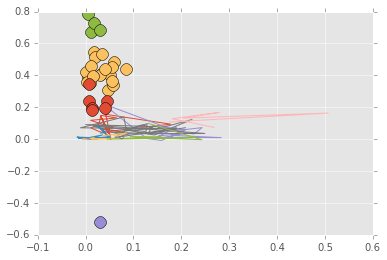

In [111]:
from sklearn.cluster import KMeans
m = KMeans(4)
csoportok["cluster"] = m.fit_predict(csoportok[[1,2,3,4,5,6,7,8,9,10]].values)
for i in set(csoportok["cluster"]):
    c = csoportok[csoportok["cluster"] == i]
    plt.plot(c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], 'o', markersize=12)
#plt.axis([-0.001, 0.15, -0.001, 0.15])
plt.show()

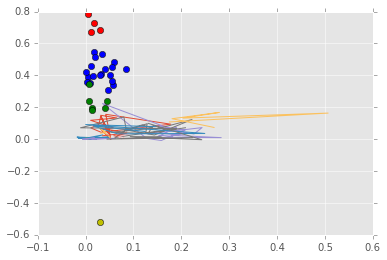

In [112]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq

# data generation
data = csoportok.as_matrix()

# computing K-Means with K = 2 (2 clusters)
centroids,_ = kmeans(data,4)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],data[idx==0,2],data[idx==0,3],data[idx==0,4],data[idx==0,5],data[idx==0,6],data[idx==0,7],data[idx==0,8],data[idx==0,9],'ob',
     data[idx==1,0],data[idx==1,1],data[idx==1,2],data[idx==1,3],data[idx==1,4],data[idx==1,5],data[idx==1,6],data[idx==1,7],data[idx==1,8],data[idx==1,9],'or',
    data[idx==2,0],data[idx==2,1],data[idx==2,2],data[idx==2,3],data[idx==2,4],data[idx==2,5],data[idx==2,6],data[idx==2,7],data[idx==2,8],data[idx==2,9],'og',
    data[idx==3,0],data[idx==3,1],data[idx==3,2],data[idx==3,3],data[idx==3,4],data[idx==3,5],data[idx==3,6],data[idx==3,7],data[idx==3,8],data[idx==3,9],'oy')
#plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [113]:
csoportok.head()

,1,2,3,4,5,6,7,8,9,10,cluster
30103,0.037463,0.060709,0.016701,0.002934,0.153013,0.020311,0.090950,0.054164,0.018055,0.545701,0
30104,0.042259,0.059680,0.031002,0.007326,0.212186,0.038060,0.143751,0.026088,0.032163,0.407487,0
30105,0.050965,0.010611,0.004341,0.000000,0.079421,0.008842,0.035531,0.021543,0.005305,0.783441,3
30106,0.037628,0.060433,0.000000,0.000000,0.157355,0.006842,0.222349,0.123147,0.004561,0.387685,0
30108,0.023962,0.084665,0.006390,0.002396,0.075080,0.001597,0.085863,0.037939,0.010783,0.671326,3


# KNN a  rendszer táblától

In [116]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
nbrs = NearestNeighbors(n_neighbors=7, algorithm='ball_tree').fit(rendszer)
distances, indices = nbrs.kneighbors(rendszer)
distances

array([[  0.        ,  25.19920634,  25.3179778 ,  25.3968502 ,
         25.47547841,  25.47547841,  25.51470164],
       [  0.        ,  33.48133809,  33.61547263,  33.73425559,
         33.76388603,  33.86738844,  33.92639091],
       [  0.        ,  16.64331698,  16.76305461,  16.85229955,
         16.97056275,  17.32050808,  17.34935157],
       [  0.        ,  11.91637529,  12.68857754,  12.76714533,
         13.        ,  14.        ,  14.49137675],
       [  0.        ,  14.07124728,  14.31782106,  14.6628783 ,
         14.86606875,  15.3622915 ,  15.49193338],
       [  0.        ,  11.26942767,  11.3137085 ,  12.        ,
         13.        ,  13.45362405,  14.24780685],
       [  0.        ,  17.72004515,  17.80449381,  17.8605711 ,
         17.94435844,  18.02775638,  18.27566688],
       [  0.        ,  20.90454496,  20.92844954,  20.95232684,
         21.02379604,  21.02379604,  21.16601049],
       [  0.        ,  21.63330765,  21.65640783,  21.9089023 ,
         22.0680

In [117]:
indices

array([[ 0,  4, 11,  3, 27, 15, 20],
       [ 1, 29,  6, 15,  2,  0, 21],
       [ 2, 10, 14, 18,  3,  4,  5],
       [ 3, 18, 14, 10,  5, 13, 11],
       [ 4, 18, 14,  5, 10,  3, 11],
       [ 5, 18, 14, 10,  3, 13, 11],
       [ 6, 18, 14, 10,  3,  5, 11],
       [ 7, 18, 10,  3,  5, 14, 25],
       [ 8, 14, 18,  5,  4,  3, 10],
       [ 9, 18, 10, 14,  3,  5, 25],
       [10, 18, 14,  5,  3, 13, 11],
       [11, 14, 18, 10,  5,  3, 13],
       [12, 15,  9,  6, 25, 27,  2],
       [13, 18, 14,  5, 10,  3, 11],
       [14, 18,  5, 10,  3, 13, 11],
       [15, 14, 18, 10, 11,  5,  3],
       [16, 14, 18,  3,  5, 10, 13],
       [17, 11, 14, 18, 20,  5,  4],
       [18, 14,  5, 10,  3, 13, 11],
       [19, 15, 25,  4, 20,  6, 14],
       [20, 10, 14, 18,  3,  5, 13],
       [21, 18, 14,  5,  3, 10, 11],
       [22, 18,  5, 14, 10,  3, 13],
       [23, 18, 14,  5, 10,  3,  4],
       [24, 18, 14, 10,  5,  3, 13],
       [25, 14, 18,  3, 10,  5, 11],
       [26, 18, 10, 14,  5,  3, 13],
 

## A boltok elhelyezkedése

In [118]:
nbrs.kneighbors_graph(rendszer).toarray()

array([[ 1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,

## A legegyedibb bolt
##1. 5 átlaga alapján, 2. a legtávolabbi nn-alapján

In [119]:
maxd=0
wstore=0
for i in range(len(distances[:,1])):
    sum=0
    for j in range(len(distances[1,:])):
        sum+=distances[i][j]
    sum/=distances.shape[1]
    if(maxd<sum):
        maxd=sum
        wstore=i
print(wstore)

1


In [120]:
print(rendszer[wstore:wstore+1].index.values)

[30104]


In [121]:
maxd2=0
wstore2=0
for i in range(len(distances[:,1])):
        if (distances[i][1] > maxd2):
            maxd2=distances[i][1]
            wstore2=i
print(maxd2)

33.4813380856


# Ajánlórendszer 1

In [125]:
#Melyik boltnak teszünk ajánlatot
shop=5
osztaly=4
dfcsop=klaszter[klaszter["cluster"] == osztaly]
mtxcsop=dfcsop.as_matrix()
oszlop=mtxcsop.size/len(mtxcsop)

In [126]:
#legnépszerűbb termék
popmax = 0
ajanlat = -1
for i in range(oszlop-1):
    if(mtxcsop[shop][i] == 0):
        pop = 0
        for j in range(len(dfcsop)):
            pop += mtxcsop[j][i]
            if(pop > popmax and j != shop):
                popmax=pop
                ajanlat=i

IndexError: index 5 is out of bounds for axis 0 with size 1

In [127]:
if(ajanlat == -1):
    print("Nem ajánlunk terméket kirakni")
else:
    print("{}: {}".format("Az ajanlatunk", dfcsop.dtypes.index[ajanlat]))

Nem ajánlunk terméket kirakni
